# Which cities are the best for data science jobs in the USA?
* Parameters used to determine which cities are best:
   * Cost of living
   * Average Salary
   * Number of jobs in each city for Data Science

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import pprint
import json
import re
import os

df = pd.read_csv("indeed_data.csv")
indeed_df = df
# Output File (CSV)
output_data_file = "cleaned_indeed_jobs.csv"

In [2]:
import re
import numpy as np

## Data pulled from Indeed API
    * Number of jobs per city is calculated

In [3]:
indeed_df.drop("onmousedown", axis=1, inplace=True)
indeed_df.drop("indeedApply", axis=1, inplace=True)
indeed_df.drop("expired", axis=1, inplace=True)
indeed_df.drop("formattedLocationFull", axis=1, inplace=True)

In [4]:
unique_df = indeed_df.groupby(["formattedLocation"])["jobtitle"].count()


In [5]:
name_list = [unique_df.index[i].split(', ') for i in range(0, len(unique_df.index))]
name_list = [e[0] for e in name_list]
unique_df.index = name_list
unique_df = unique_df.to_frame()
unique_df = unique_df.reset_index()
unique_df.head()

,index,jobtitle
0,Ada,1
1,Adelphi,1
2,Albuquerque,2
3,Alexandria,3
4,Alpharetta,2


## Cost of Living for different cities is pulled from Numbeo API

In [6]:
# Create a dataframe with Cost of Living Index for all the cities 

filename = os.path.join("..", "Cost_Of_Living_Output_Data", "COLI.csv")
df_COLI_complete = pd.read_csv(filename)
df_COLI_complete["City"] = df_COLI_complete["City"].str.slice(0, -4)
df_COLI_complete = df_COLI_complete.drop(["Rank", "City ID", "Country", "Purchasing Power" ], axis =1)
df_COLI_complete.head()

,City,Cost Of Living Index
0,New York,100.000000
1,San Francisco,91.280893
2,Anchorage,91.135599
3,Honolulu,89.477840
4,Brooklyn,88.600780


In [7]:
filename = os.path.join("..", "Cost_Of_Living_Output_Data", "COLI_new.csv")
df_COL = pd.read_csv(filename)
df_COL = df_COL.drop(['Unnamed: 0'], axis=1)
df_COL.head()

,City,Cost Of Living Index
0,New York,100.000000
1,San Francisco,91.280893
2,Washington,87.528224
3,Seattle,85.556800
4,Boston,82.666323


## Number of Students enrolled in 4 years degree Public university CSV pulled from "National Center for Education Statistics"

In [8]:
filename1 = os.path.join("..", "School population by city.csv")
df_student = pd.read_csv(filename1)
df_student = df_student.rename(columns={"Row Labels": "City"})

df_student["City"] =[df_student["City"][i].lstrip() for i in range(0, len(df_student["City"]))]

In [9]:
df_student.head()

,City,Sum of Student population
0,Miami,112915.0
1,New York,80709.0
2,Houston,79282.0
3,Los Angeles,72573.0
4,Athens,72216.0


In [10]:
# Create a dataframe with Cost of Living Index and Student population for all the cities 
df_col_complete_student = pd.merge(df_COLI_complete, df_student, how="left", on="City")
df_col_complete_student.head()

,City,Cost Of Living Index,Sum of Student population
0,New York,100.000000,80709.0
1,San Francisco,91.280893,29778.0
2,Anchorage,91.135599,14644.0
3,Honolulu,89.477840,17710.0
4,Brooklyn,88.600780,42068.0


In [11]:
df_col_student = pd.merge(df_COL, df_student, how="left", on="City")
df_col_student.head()

,City,Cost Of Living Index,Sum of Student population
0,New York,100.000000,80709.0
1,San Francisco,91.280893,29778.0
2,Washington,87.528224,4244.0
3,Seattle,85.556800,47400.0
4,Boston,82.666323,16164.0


# Merged the data for Cost of living, Number of Students and Number of Jobs on "City"

In [12]:
df_col_student_jobs = pd.merge(df_col_student, unique_df, how="left", left_on="City", right_on="index")

In [13]:
df_col_student_jobs.drop("index", axis=1, inplace=True)
df_col_student_jobs.rename(columns={"jobtitle": "No.of Jobs"}, inplace=True)

In [14]:
filename3 = os.path.join("..", "COLI w average salary.csv")
df_salary = pd.read_csv(filename3)

df_salary["City"] = [df_salary["City"][i].split(', ')[0] for i in range(0, len(df_salary["City"]))]
df_salary.head()
df_col_student_jobs_salary = pd.merge(df_col_student_jobs, df_salary, how="left", left_on="City", right_on="City")
df_col_student_jobs_salary

,City,Cost Of Living Index_x,Sum of Student population,No.of Jobs,Rank,City ID,Country,Cost Of Living Index_y,Purchasing Power,Data Science Average Salary,...,Data Analysts High,Average Pay vs National Avg.1,Data Engineer Average Salary,Data Engineer Low,Data Engineer High,Average Pay vs National Avg.2,Data Architect Average Salary,Data Architect Low,Data Architect High,Average Pay vs National Avg.3
0,New York,100.000000,80709.0,52,1,3455,United States,100.000000,100.000000,"$95,342.00",...,"$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%
1,San Francisco,91.280893,29778.0,29,2,3483,United States,91.466340,136.044823,"$119,907.00",...,"$95,000.00",33%,"$107,660.00","$81,000.00","$149,000.00",24%,"$101,802.00","$77,000.00","$130,000.00",23%
2,Washington,87.528224,4244.0,17,6,3497,United States,87.678570,130.295852,"$87,176.00",...,"$79,000.00",10%,"$92,363.00","$69,000.00","$132,000.00",6%,"$91,735.00","$70,000.00","$118,000.00",11%
3,Seattle,85.556800,47400.0,27,8,3487,United States,85.630842,133.483025,"$106,358.00",...,"$76,000.00",6%,"$87,612.00","$66,000.00","$124,000.00",1%,"$88,133.00","$67,000.00","$114,000.00",6%
4,Boston,82.666323,16164.0,21,9,3400,United States,82.799507,112.477323,"$93,032.00",...,"$76,000.00",5%,"$82,256.00","$61,000.00","$118,000.00",-5%,"$86,720.00","$66,000.00","$112,000.00",5%
5,Chicago,79.986539,42750.0,21,11,3405,United States,80.125871,111.903520,"$86,460.00",...,"$70,000.00",-3%,"$79,689.00","$59,000.00",$115.00,-8%,"$88,069.00","$67,000.00","$113,000.00",6%
6,Atlanta,73.683302,67039.0,17,27,3391,United States,73.723803,140.655508,"$85,323.00",...,"$67,000.00",-6%,"$73,514.00","$54,000.00","$106,000.00",-16%,"$82,414.00","$62,000.00","$107,000.00",-1%
7,Charlotte,72.222532,29710.0,20,31,3403,United States,72.348339,144.345781,"$81,785.00",...,"$69,000.00",-4%,"$67,800.00","$50,000.00","$98,000.00",-22%,"$77,845.00","$59,000.00","$101,000.00",-6%
8,Austin,67.638412,51832.0,20,41,3393,United States,67.499437,146.489099,"$89,100.00",...,"$70,000.00",-2%,"$77,450.00","$57,000.00","$111,000.00",-11%,"$85,756.00","$65,000.00","$110,000.00",4%


# Merged the Average Salary information

In [15]:
df_indeed_salary = pd.DataFrame({"Avg Salary Indeed": \
                                 [141520.00, 161743.00, 123915.00, 180106.00, 118409.00, 115912.00, 114744.00, 114054.00, 114853.00, 126646],\
                                "City": ["New York", "San Francisco", "Seattle", "Mountain View", "Boston","Chicago", "Austin", "Charlotte", "Washington", "Atlanta"]
                                })

In [16]:
df_col_student_jobs_salary_final = pd.merge(df_col_student_jobs_salary, df_indeed_salary, how="left", left_on="City", right_on="City")


In [17]:
df_col_student_jobs_salary_final.drop("Rank",axis=1, inplace=True)
df_col_student_jobs_salary_final.drop("City ID",axis=1, inplace=True)
df_col_student_jobs_salary_final.drop("Country",axis=1, inplace=True)
df_col_student_jobs_salary_final.drop("Cost Of Living Index_y",axis=1, inplace=True)
df_col_student_jobs_salary_final.drop("Purchasing Power",axis=1, inplace=True)
df_col_student_jobs_salary_final.rename(columns={"Cost Of Living Index_x": "Cost Of Living Index"}, inplace=True)

In [18]:
# rearranging the order of the columns as desired
df_col_student_jobs_salary_final = df_col_student_jobs_salary_final[['City', 'No.of Jobs', 'Avg Salary Indeed','Cost Of Living Index', 'Sum of Student population',
        'Data Science Average Salary', 'Data Scientist Low',
       'Data Scientist High', 'Average Pay vs National Avg',
       'Data Analyst Average Salary', 'Data Analyst Low', 'Data Analysts High',
       'Average Pay vs National Avg.1', 'Data Engineer Average Salary',
       'Data Engineer Low', 'Data Engineer High',
       'Average Pay vs National Avg.2', 'Data Architect Average Salary',
       'Data Architect Low', 'Data Architect High',
       'Average Pay vs National Avg.3']]
df_col_student_jobs_salary_final

,City,No.of Jobs,Avg Salary Indeed,Cost Of Living Index,Sum of Student population,Data Science Average Salary,Data Scientist Low,Data Scientist High,Average Pay vs National Avg,Data Analyst Average Salary,...,Data Analysts High,Average Pay vs National Avg.1,Data Engineer Average Salary,Data Engineer Low,Data Engineer High,Average Pay vs National Avg.2,Data Architect Average Salary,Data Architect Low,Data Architect High,Average Pay vs National Avg.3
0,New York,52,141520.0,100.000000,80709.0,"$95,342.00","$73,000.00","$125,000.00",0%,"$56,071.00",...,"$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%
1,San Francisco,29,161743.0,91.280893,29778.0,"$119,907.00","$93,000.00","$154,000.00",26%,"$70,015.00",...,"$95,000.00",33%,"$107,660.00","$81,000.00","$149,000.00",24%,"$101,802.00","$77,000.00","$130,000.00",23%
2,Washington,17,114853.0,87.528224,4244.0,"$87,176.00","$67,000.00","$114,000.00",-9%,"$57,579.00",...,"$79,000.00",10%,"$92,363.00","$69,000.00","$132,000.00",6%,"$91,735.00","$70,000.00","$118,000.00",11%
3,Seattle,27,123915.0,85.556800,47400.0,"$106,358.00","$83,000.00","$137,000.00",11%,"$55,797.00",...,"$76,000.00",6%,"$87,612.00","$66,000.00","$124,000.00",1%,"$88,133.00","$67,000.00","$114,000.00",6%
4,Boston,21,118409.0,82.666323,16164.0,"$93,032.00","$71,000.00","$121,000.00",-3%,"$55,451.00",...,"$76,000.00",5%,"$82,256.00","$61,000.00","$118,000.00",-5%,"$86,720.00","$66,000.00","$112,000.00",5%
5,Chicago,21,115912.0,79.986539,42750.0,"$86,460.00","$66,000.00","$113,000.00",-10%,"$51,065.00",...,"$70,000.00",-3%,"$79,689.00","$59,000.00",$115.00,-8%,"$88,069.00","$67,000.00","$113,000.00",6%
6,Atlanta,17,126646.0,73.683302,67039.0,"$85,323.00","$66,000.00","$112,000.00",-11%,"$49,270.00",...,"$67,000.00",-6%,"$73,514.00","$54,000.00","$106,000.00",-16%,"$82,414.00","$62,000.00","$107,000.00",-1%
7,Charlotte,20,114054.0,72.222532,29710.0,"$81,785.00","$63,000.00","$107,000.00",-14%,"$50,281.00",...,"$69,000.00",-4%,"$67,800.00","$50,000.00","$98,000.00",-22%,"$77,845.00","$59,000.00","$101,000.00",-6%
8,Austin,20,114744.0,67.638412,51832.0,"$89,100.00","$69,000.00","$117,000.00",-7%,"$51,484.00",...,"$70,000.00",-2%,"$77,450.00","$57,000.00","$111,000.00",-11%,"$85,756.00","$65,000.00","$110,000.00",4%


# Calculated the a Normalized Index as = (1/(%Cost Of Living Index)) x Avg Salary / NY Avg Salary

In [19]:
# Extracting the salary of New york into a variable
New_York_Salary = df_col_student_jobs_salary_final.loc[df_col_student_jobs_salary_final['City'] == "New York"]["Avg Salary Indeed"]
# calculate the index based on average salary and cost of living of every city and normalize it for New york
list = np.array([(100*df_col_student_jobs_salary_final["Avg Salary Indeed"][i]/\
                                                           df_col_student_jobs_salary_final["Cost Of Living Index"][i])/New_York_Salary for i in range(0,len(df_col_student_jobs_salary_final))]).tolist()
#Flattening the list of lists and assigning it to a new coloumn in dataframe
df_col_student_jobs_salary_final["SalaryCOLIndex"] = [y for x in list for y in x]
# rearranging the order of the columns as desired
df_col_student_jobs_salary_final =df_col_student_jobs_salary_final[['City', 'No.of Jobs', 'Avg Salary Indeed','Cost Of Living Index',"SalaryCOLIndex", 'Sum of Student population',
        'Data Science Average Salary', 'Data Scientist Low',
       'Data Scientist High', 'Average Pay vs National Avg',
       'Data Analyst Average Salary', 'Data Analyst Low', 'Data Analysts High',
       'Average Pay vs National Avg.1', 'Data Engineer Average Salary',
       'Data Engineer Low', 'Data Engineer High',
       'Average Pay vs National Avg.2', 'Data Architect Average Salary',
       'Data Architect Low', 'Data Architect High',
       'Average Pay vs National Avg.3']]
df_col_student_jobs_salary_final

,City,No.of Jobs,Avg Salary Indeed,Cost Of Living Index,SalaryCOLIndex,Sum of Student population,Data Science Average Salary,Data Scientist Low,Data Scientist High,Average Pay vs National Avg,...,Data Analysts High,Average Pay vs National Avg.1,Data Engineer Average Salary,Data Engineer Low,Data Engineer High,Average Pay vs National Avg.2,Data Architect Average Salary,Data Architect Low,Data Architect High,Average Pay vs National Avg.3
0,New York,52,141520.0,100.000000,1.000000,80709.0,"$95,342.00","$73,000.00","$125,000.00",0%,...,"$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%
1,San Francisco,29,161743.0,91.280893,1.252068,29778.0,"$119,907.00","$93,000.00","$154,000.00",26%,...,"$95,000.00",33%,"$107,660.00","$81,000.00","$149,000.00",24%,"$101,802.00","$77,000.00","$130,000.00",23%
2,Washington,17,114853.0,87.528224,0.927206,4244.0,"$87,176.00","$67,000.00","$114,000.00",-9%,...,"$79,000.00",10%,"$92,363.00","$69,000.00","$132,000.00",6%,"$91,735.00","$70,000.00","$118,000.00",11%
3,Seattle,27,123915.0,85.556800,1.023414,47400.0,"$106,358.00","$83,000.00","$137,000.00",11%,...,"$76,000.00",6%,"$87,612.00","$66,000.00","$124,000.00",1%,"$88,133.00","$67,000.00","$114,000.00",6%
4,Boston,21,118409.0,82.666323,1.012135,16164.0,"$93,032.00","$71,000.00","$121,000.00",-3%,...,"$76,000.00",5%,"$82,256.00","$61,000.00","$118,000.00",-5%,"$86,720.00","$66,000.00","$112,000.00",5%
5,Chicago,21,115912.0,79.986539,1.023985,42750.0,"$86,460.00","$66,000.00","$113,000.00",-10%,...,"$70,000.00",-3%,"$79,689.00","$59,000.00",$115.00,-8%,"$88,069.00","$67,000.00","$113,000.00",6%
6,Atlanta,17,126646.0,73.683302,1.214520,67039.0,"$85,323.00","$66,000.00","$112,000.00",-11%,...,"$67,000.00",-6%,"$73,514.00","$54,000.00","$106,000.00",-16%,"$82,414.00","$62,000.00","$107,000.00",-1%
7,Charlotte,20,114054.0,72.222532,1.115886,29710.0,"$81,785.00","$63,000.00","$107,000.00",-14%,...,"$69,000.00",-4%,"$67,800.00","$50,000.00","$98,000.00",-22%,"$77,845.00","$59,000.00","$101,000.00",-6%
8,Austin,20,114744.0,67.638412,1.198723,51832.0,"$89,100.00","$69,000.00","$117,000.00",-7%,...,"$70,000.00",-2%,"$77,450.00","$57,000.00","$111,000.00",-11%,"$85,756.00","$65,000.00","$110,000.00",4%


In [20]:
df_coli_complete_student_jobs = pd.merge(df_col_complete_student, unique_df, how="left", left_on="City", right_on="index")

In [21]:
df_coli_complete_student_jobs.drop("index", axis=1, inplace=True)
df_coli_complete_student_jobs.rename(columns={"jobtitle": "No.of Jobs"}, inplace=True)

In [22]:
df_coli_complete_student_jobs.head()

,City,Cost Of Living Index,Sum of Student population,No.of Jobs
0,New York,100.000000,80709.0,52.0
1,San Francisco,91.280893,29778.0,29.0
2,Anchorage,91.135599,14644.0,1.0
3,Honolulu,89.477840,17710.0,NaN
4,Brooklyn,88.600780,42068.0,NaN


In [23]:
df_coli_complete_student_jobs_salary = pd.merge(df_coli_complete_student_jobs, df_salary, how="left", left_on="City", right_on="City")
df_coli_complete_student_jobs_salary = df_coli_complete_student_jobs_salary.drop(["Rank", "City ID", "Country", "Purchasing Power", "Cost Of Living Index_y"], axis =1)
df_coli_complete_student_jobs_salary.head()

,City,Cost Of Living Index_x,Sum of Student population,No.of Jobs,Data Science Average Salary,Data Scientist Low,Data Scientist High,Average Pay vs National Avg,Data Analyst Average Salary,Data Analyst Low,Data Analysts High,Average Pay vs National Avg.1,Data Engineer Average Salary,Data Engineer Low,Data Engineer High,Average Pay vs National Avg.2,Data Architect Average Salary,Data Architect Low,Data Architect High,Average Pay vs National Avg.3
0,New York,100.000000,80709.0,52.0,"$95,342.00","$73,000.00","$125,000.00",0%,"$56,071.00","$39,000.00","$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%
1,San Francisco,91.280893,29778.0,29.0,"$119,907.00","$93,000.00","$154,000.00",26%,"$70,015.00","$49,000.00","$95,000.00",33%,"$107,660.00","$81,000.00","$149,000.00",24%,"$101,802.00","$77,000.00","$130,000.00",23%
2,Anchorage,91.135599,14644.0,1.0,"$92,896.00","$72,000.00","$121,000.00",-3%,"$55,024.00","$38,000.00","$75,000.00",5%,"$84,834.00","$63,000.00","$121,000.00",-3%,"$86,783.00","$66,000.00","$112,000.00",5%
3,Honolulu,89.477840,17710.0,NaN,"$87,004.00","$67,000.00","$114,000.00",-9%,"$52,013.00","$36,000.00","$71,000.00",-1%,"$79,596.00","$59,000.00","$114,000.00",-9%,"$81,169.00","$61,000.00","$105,000.00",-2%
4,Brooklyn,88.600780,42068.0,NaN,"$95,342.00","$73,000.00","$125,000.00",0%,"$56,071.00","$39,000.00","$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%


In [24]:
df_coli_complete_student_jobs_salary = df_coli_complete_student_jobs_salary.rename(columns={"Cost Of Living Index_x": "Cost Of Living Index"})

In [25]:
df_coli_complete_student_jobs_salary.head()

,City,Cost Of Living Index,Sum of Student population,No.of Jobs,Data Science Average Salary,Data Scientist Low,Data Scientist High,Average Pay vs National Avg,Data Analyst Average Salary,Data Analyst Low,Data Analysts High,Average Pay vs National Avg.1,Data Engineer Average Salary,Data Engineer Low,Data Engineer High,Average Pay vs National Avg.2,Data Architect Average Salary,Data Architect Low,Data Architect High,Average Pay vs National Avg.3
0,New York,100.000000,80709.0,52.0,"$95,342.00","$73,000.00","$125,000.00",0%,"$56,071.00","$39,000.00","$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%
1,San Francisco,91.280893,29778.0,29.0,"$119,907.00","$93,000.00","$154,000.00",26%,"$70,015.00","$49,000.00","$95,000.00",33%,"$107,660.00","$81,000.00","$149,000.00",24%,"$101,802.00","$77,000.00","$130,000.00",23%
2,Anchorage,91.135599,14644.0,1.0,"$92,896.00","$72,000.00","$121,000.00",-3%,"$55,024.00","$38,000.00","$75,000.00",5%,"$84,834.00","$63,000.00","$121,000.00",-3%,"$86,783.00","$66,000.00","$112,000.00",5%
3,Honolulu,89.477840,17710.0,NaN,"$87,004.00","$67,000.00","$114,000.00",-9%,"$52,013.00","$36,000.00","$71,000.00",-1%,"$79,596.00","$59,000.00","$114,000.00",-9%,"$81,169.00","$61,000.00","$105,000.00",-2%
4,Brooklyn,88.600780,42068.0,NaN,"$95,342.00","$73,000.00","$125,000.00",0%,"$56,071.00","$39,000.00","$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%


# Update the list with indeed salary for all the 58 cities

In [26]:
cities = df_COLI_complete["City"]

In [27]:
avg_salary = [134331.00, 161743.00, 103574.00, 100336.00, 100336.00, 125697.00, 92615.00, 123915.00, 123915.00,
              155451.00, 115912.00, 93041.00, 122194.00, 146202.00, 114914.00, 100372.00, 108227.00, 108994.00,
              120914.00, 104564.00, 115589.00, 114337.00, 129231.00, 106862.00, 100161.00, 112906.00, 112906.00,
              134233.00, 116869.00, 105176.00, 114054.00, 95440.00, 105575.00, 161022.00, 102829.00, 114153.00, 
              110652.00, 94649.00, 115614.00, 84254.00, 114744.00, 93872.00, 145960.00, 101190.00, 126357.00,
              96366.00, 100331.00, 127686.00, 115351.00, 119778.00, 99338.00, 110173.00, 95783.00, 114947.00, 
              115129.00, 94929.00, 95729.00, 90917.00]
len(avg_salary)

58

In [28]:
df_indeed_salary = pd.DataFrame({"Avg Salary Indeed": avg_salary,
                                "City": cities
                                })

In [29]:
df_col_complete_student_jobs_salary_final = pd.merge(df_coli_complete_student_jobs_salary, df_indeed_salary, how="left", left_on="City", right_on="City")
df_col_complete_student_jobs_salary_final = df_col_complete_student_jobs_salary_final[['City', 'No.of Jobs', 'Avg Salary Indeed', 'Cost Of Living Index',
                                                'Sum of Student population', 'Data Science Average Salary', 'Data Scientist Low',
                                                'Data Scientist High','Average Pay vs National Avg', 'Data Analyst Average Salary',
                                                'Data Analyst Low', 'Data Analysts High', 'Average Pay vs National Avg.1', 
                                                'Data Engineer Average Salary','Data Engineer Low', 'Data Engineer High', 
                                                'Average Pay vs National Avg.2', 'Data Architect Average Salary', 
                                                'Data Architect Low', 'Data Architect High', 'Average Pay vs National Avg.3']]
df_col_complete_student_jobs_salary_final.head(10)

,City,No.of Jobs,Avg Salary Indeed,Cost Of Living Index,Sum of Student population,Data Science Average Salary,Data Scientist Low,Data Scientist High,Average Pay vs National Avg,Data Analyst Average Salary,...,Data Analysts High,Average Pay vs National Avg.1,Data Engineer Average Salary,Data Engineer Low,Data Engineer High,Average Pay vs National Avg.2,Data Architect Average Salary,Data Architect Low,Data Architect High,Average Pay vs National Avg.3
0,New York,52.0,134331.0,100.000000,80709.0,"$95,342.00","$73,000.00","$125,000.00",0%,"$56,071.00",...,"$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%
1,San Francisco,29.0,161743.0,91.280893,29778.0,"$119,907.00","$93,000.00","$154,000.00",26%,"$70,015.00",...,"$95,000.00",33%,"$107,660.00","$81,000.00","$149,000.00",24%,"$101,802.00","$77,000.00","$130,000.00",23%
2,Anchorage,1.0,103574.0,91.135599,14644.0,"$92,896.00","$72,000.00","$121,000.00",-3%,"$55,024.00",...,"$75,000.00",5%,"$84,834.00","$63,000.00","$121,000.00",-3%,"$86,783.00","$66,000.00","$112,000.00",5%
3,Honolulu,NaN,100336.0,89.477840,17710.0,"$87,004.00","$67,000.00","$114,000.00",-9%,"$52,013.00",...,"$71,000.00",-1%,"$79,596.00","$59,000.00","$114,000.00",-9%,"$81,169.00","$61,000.00","$105,000.00",-2%
4,Brooklyn,NaN,100336.0,88.600780,42068.0,"$95,342.00","$73,000.00","$125,000.00",0%,"$56,071.00",...,"$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%
5,Washington,17.0,125697.0,87.528224,4244.0,"$87,176.00","$67,000.00","$114,000.00",-9%,"$57,579.00",...,"$79,000.00",10%,"$92,363.00","$69,000.00","$132,000.00",6%,"$91,735.00","$70,000.00","$118,000.00",11%
6,Oakland,2.0,92615.0,86.291439,NaN,"$119,907.00","$93,000.00","$154,000.00",26%,"$70,015.00",...,"$95,000.00",33%,"$107,660.00","$81,000.00","$149,000.00",24%,"$101,802.00","$77,000.00","$130,000.00",23%
7,Oakland,1.0,92615.0,86.291439,NaN,"$119,907.00","$93,000.00","$154,000.00",26%,"$70,015.00",...,"$95,000.00",33%,"$107,660.00","$81,000.00","$149,000.00",24%,"$101,802.00","$77,000.00","$130,000.00",23%
8,Seattle,27.0,123915.0,85.556800,47400.0,"$106,358.00","$83,000.00","$137,000.00",11%,"$55,797.00",...,"$76,000.00",6%,"$87,612.00","$66,000.00","$124,000.00",1%,"$88,133.00","$67,000.00","$114,000.00",6%
9,Boston,21.0,123915.0,82.666323,16164.0,"$93,032.00","$71,000.00","$121,000.00",-3%,"$55,451.00",...,"$76,000.00",5%,"$82,256.00","$61,000.00","$118,000.00",-5%,"$86,720.00","$66,000.00","$112,000.00",5%


In [30]:
# Extracting the salary of New york into a variable
New_York_Salary = df_col_complete_student_jobs_salary_final.loc[df_col_complete_student_jobs_salary_final['City'] == "New York"]["Avg Salary Indeed"]
# calculate the index based on average salary and cost of living of every city and normalize it for New york
list = np.array([(100*df_col_complete_student_jobs_salary_final["Avg Salary Indeed"][i]/\
                                                           df_col_complete_student_jobs_salary_final["Cost Of Living Index"][i])/New_York_Salary for i in range(0,len(df_col_complete_student_jobs_salary_final))]).tolist()
#Flattening the list of lists and assigning it to a new coloumn in dataframe
df_col_complete_student_jobs_salary_final["SalaryCOLIndex"] = [y for x in list for y in x]
# rearranging the order of the columns as desired
df_col_complete_student_jobs_salary_final =df_col_complete_student_jobs_salary_final[['City', 'No.of Jobs', 'Avg Salary Indeed','Cost Of Living Index',"SalaryCOLIndex", 'Sum of Student population',
        'Data Science Average Salary', 'Data Scientist Low',
       'Data Scientist High', 'Average Pay vs National Avg',
       'Data Analyst Average Salary', 'Data Analyst Low', 'Data Analysts High',
       'Average Pay vs National Avg.1', 'Data Engineer Average Salary',
       'Data Engineer Low', 'Data Engineer High',
       'Average Pay vs National Avg.2', 'Data Architect Average Salary',
       'Data Architect Low', 'Data Architect High',
       'Average Pay vs National Avg.3']]
df_col_complete_student_jobs_salary_final

,City,No.of Jobs,Avg Salary Indeed,Cost Of Living Index,SalaryCOLIndex,Sum of Student population,Data Science Average Salary,Data Scientist Low,Data Scientist High,Average Pay vs National Avg,...,Data Analysts High,Average Pay vs National Avg.1,Data Engineer Average Salary,Data Engineer Low,Data Engineer High,Average Pay vs National Avg.2,Data Architect Average Salary,Data Architect Low,Data Architect High,Average Pay vs National Avg.3
0,New York,52.0,134331.0,100.000000,1.000000,80709.0,"$95,342.00","$73,000.00","$125,000.00",0%,...,"$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%
1,San Francisco,29.0,161743.0,91.280893,1.319075,29778.0,"$119,907.00","$93,000.00","$154,000.00",26%,...,"$95,000.00",33%,"$107,660.00","$81,000.00","$149,000.00",24%,"$101,802.00","$77,000.00","$130,000.00",23%
2,Anchorage,1.0,103574.0,91.135599,0.846031,14644.0,"$92,896.00","$72,000.00","$121,000.00",-3%,...,"$75,000.00",5%,"$84,834.00","$63,000.00","$121,000.00",-3%,"$86,783.00","$66,000.00","$112,000.00",5%
3,Honolulu,NaN,100336.0,89.477840,0.834767,17710.0,"$87,004.00","$67,000.00","$114,000.00",-9%,...,"$71,000.00",-1%,"$79,596.00","$59,000.00","$114,000.00",-9%,"$81,169.00","$61,000.00","$105,000.00",-2%
4,Brooklyn,NaN,100336.0,88.600780,0.843030,42068.0,"$95,342.00","$73,000.00","$125,000.00",0%,...,"$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Detroit,5.0,114947.0,63.692293,1.343490,27025.0,"$86,886.00","$67,000.00","$114,000.00",-9%,...,"$68,000.00",-5%,"$73,342.00","$54,000.00","$106,000.00",-16%,"$81,924.00","$62,000.00","$106,000.00",-1%
59,Cincinnati,3.0,115129.0,61.491080,1.393787,37886.0,"$95,804.00","$75,000.00","$124,000.00",-15%,...,"$68,000.00",-5%,"$73,269.00","$54,000.00","$105,000.00",-16%,"$74,800.00","$56,000.00","$97,000.00",-10%
60,Boise,NaN,94929.0,60.554881,1.167007,25504.0,"$78,433.00","$60,000.00","$103,000.00",-18%,...,"$62,000.00",-14%,"$71,927.00","$53,000.00","$103,000.00",-17%,"$73,513.00","$55,000.00","$95,000.00",-11%
61,Little Rock,2.0,95729.0,59.613573,1.195424,10515.0,"$75,714.00","$58,000.00","$100,000.00",-21%,...,"$58,000.00",-20%,"$69,540.00","$51,000.00","$100,000.00",-20%,"$71,053.00","$53,000.00","$92,000.00",-14%


In [31]:
df_col_complete_student_jobs_salary_final = df_col_complete_student_jobs_salary_final.sort_values(by=['No.of Jobs'], ascending=False)
df_col_complete_student_jobs_salary_final.head(20)

,City,No.of Jobs,Avg Salary Indeed,Cost Of Living Index,SalaryCOLIndex,Sum of Student population,Data Science Average Salary,Data Scientist Low,Data Scientist High,Average Pay vs National Avg,...,Data Analysts High,Average Pay vs National Avg.1,Data Engineer Average Salary,Data Engineer Low,Data Engineer High,Average Pay vs National Avg.2,Data Architect Average Salary,Data Architect Low,Data Architect High,Average Pay vs National Avg.3
0,New York,52.0,134331.0,100.000000,1.000000,80709.0,"$95,342.00","$73,000.00","$125,000.00",0%,...,"$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%
1,San Francisco,29.0,161743.0,91.280893,1.319075,29778.0,"$119,907.00","$93,000.00","$154,000.00",26%,...,"$95,000.00",33%,"$107,660.00","$81,000.00","$149,000.00",24%,"$101,802.00","$77,000.00","$130,000.00",23%
8,Seattle,27.0,123915.0,85.556800,1.078185,47400.0,"$106,358.00","$83,000.00","$137,000.00",11%,...,"$76,000.00",6%,"$87,612.00","$66,000.00","$124,000.00",1%,"$88,133.00","$67,000.00","$114,000.00",6%
9,Boston,21.0,123915.0,82.666323,1.115884,16164.0,"$93,032.00","$71,000.00","$121,000.00",-3%,...,"$76,000.00",5%,"$82,256.00","$61,000.00","$118,000.00",-5%,"$86,720.00","$66,000.00","$112,000.00",5%
11,Chicago,21.0,115912.0,79.986539,1.078786,42750.0,"$86,460.00","$66,000.00","$113,000.00",-10%,...,"$70,000.00",-3%,"$79,689.00","$59,000.00",$115.00,-8%,"$88,069.00","$67,000.00","$113,000.00",6%
44,Austin,20.0,114744.0,67.638412,1.262875,51832.0,"$89,100.00","$69,000.00","$117,000.00",-7%,...,"$70,000.00",-2%,"$77,450.00","$57,000.00","$111,000.00",-11%,"$85,756.00","$65,000.00","$110,000.00",4%
32,Charlotte,20.0,114054.0,72.222532,1.175605,29710.0,"$81,785.00","$63,000.00","$107,000.00",-14%,...,"$69,000.00",-4%,"$67,800.00","$50,000.00","$98,000.00",-22%,"$77,845.00","$59,000.00","$101,000.00",-6%
5,Washington,17.0,125697.0,87.528224,1.069056,4244.0,"$87,176.00","$67,000.00","$114,000.00",-9%,...,"$79,000.00",10%,"$92,363.00","$69,000.00","$132,000.00",6%,"$91,735.00","$70,000.00","$118,000.00",11%
27,Atlanta,17.0,112906.0,73.683302,1.140701,67039.0,"$85,323.00","$66,000.00","$112,000.00",-11%,...,"$67,000.00",-6%,"$73,514.00","$54,000.00","$106,000.00",-16%,"$82,414.00","$62,000.00","$107,000.00",-1%
46,Phoenix,15.0,145960.0,67.247005,1.615789,NaN,"$86,427.00","$66,000.00","$113,000.00",10%,...,"$69,000.00",-4%,"$75,149.00","$56,000.00","$108,000.00",-14%,"$83,303.00","$63,000.00","$108,000.00",1%


# Calculated the a Normalized Index as = (1/(%Cost Of Living Index)) x Avg Salary / NY Avg Salary

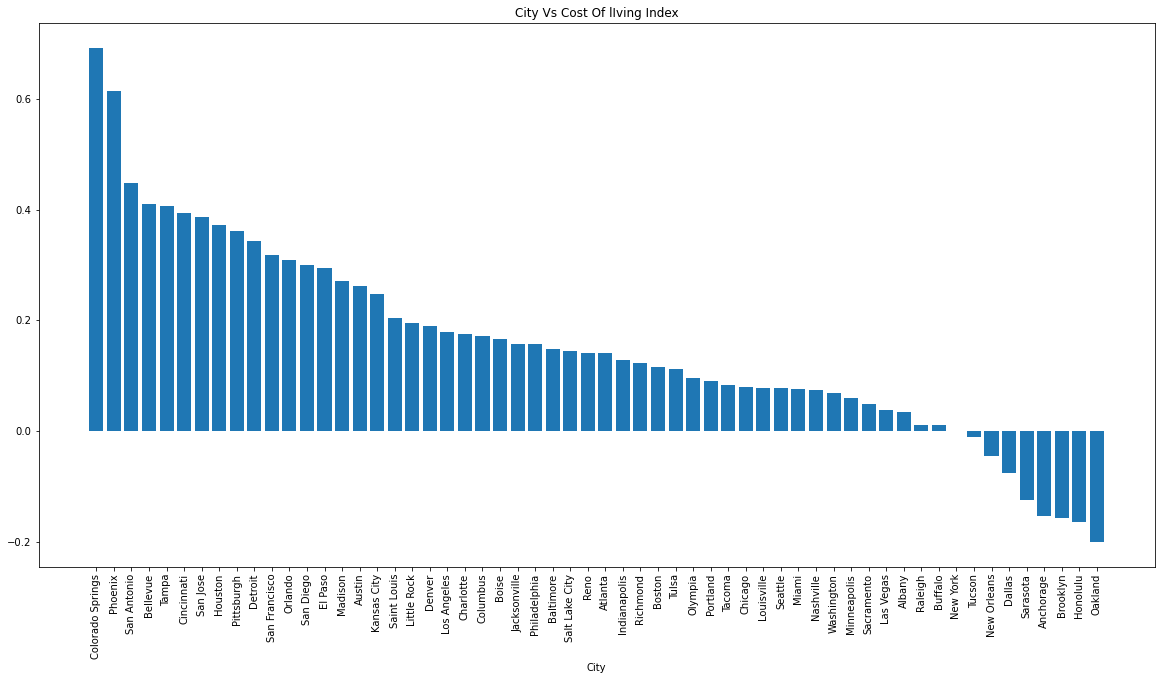

In [32]:
# Graph to plot number of cureent jobs Vs Citites
df_SalaryCOLIndex_Cities = df_col_complete_student_jobs_salary_final.sort_values(by=['SalaryCOLIndex'], ascending=False)
#df_SalaryCOLIndex_Cities.columns
df_SalaryCOLIndex_Cities = df_SalaryCOLIndex_Cities[['City', 'No.of Jobs', 'Avg Salary Indeed','Cost Of Living Index',"SalaryCOLIndex"]]
df_SalaryCOLIndex_Cities.head()
#df_final["SalaryCOLIndex"].values
plt.figure(figsize=(20,10))
plt.xlabel("City")
plt.title("City Vs Cost Of lIving Index")
plt.xticks(rotation='vertical')
# plt.yticks(ticks=df_final["SalaryCOLIndex"], labels=df_final["SalaryCOLIndex"].values.tolist())
plt.bar(df_SalaryCOLIndex_Cities["City"],df_SalaryCOLIndex_Cities["SalaryCOLIndex"] -1)
plt.show()

# Education requirement for the Jobs

,Bachelor's,Master's,Phd
Count,77,42,9


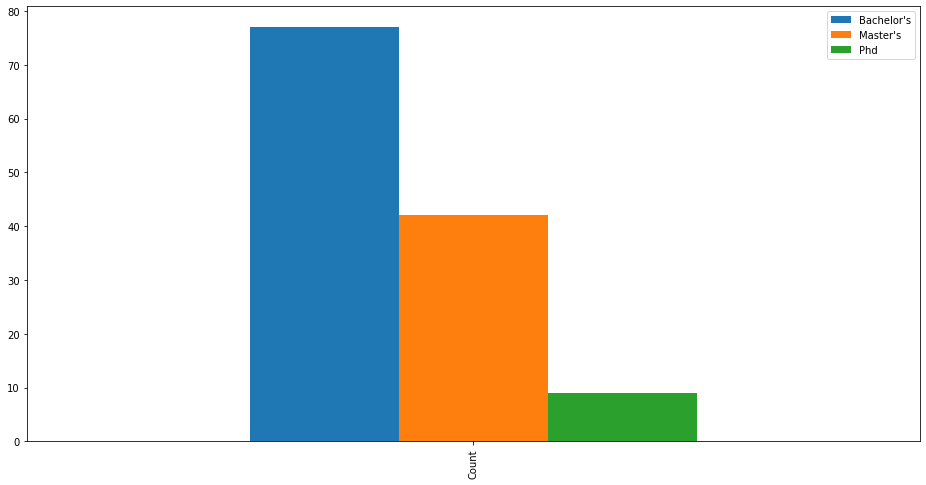

In [33]:
def has_bachelor(s):
    return (
        bool(re.search(r"bachelors?'?s?", s, re.IGNORECASE)) or
        bool(re.search(r"\sB\.?A\.?\s", s, re.IGNORECASE)) or
        bool(re.search(r"\sB\.?S\.?\s", s, re.IGNORECASE))
    )
def has_masters(s):
    return (
        bool(re.search(r"masters?'?s?\s", s, re.IGNORECASE)) or
        bool(re.search(r"\sM\.?A\.?\s", s, re.IGNORECASE)) or
        bool(re.search(r"\sM\.?S\.?\s", s, re.IGNORECASE)) or
        bool(re.search(r"M\.?B\.?A\.?\s", s, re.IGNORECASE))
    )
def has_phd(s):
    return(
        (bool(re.search(r"Ph\.?d", s, re.IGNORECASE))) 
    )
education_df = pd.DataFrame({
    "Bachelor's": indeed_df["snippet"].apply(has_bachelor).value_counts(())[1],
    "Master's": indeed_df["snippet"].apply(has_masters).value_counts(())[1],
    "Phd": indeed_df["snippet"].apply(has_phd).value_counts(())[1],
},index=["Count"])
education_df.plot(kind='bar', figsize=(16,8))
education_df

# Number of years of experience requirement for the Jobs

In [34]:
def extract_years_only(s):
    results = re.findall(r"([0-9]*)\+?.[yY]ear.*", s)
    if results and results[0]:
        return int(results[0])
    else:
        return np.nan

In [35]:
years = df["snippet"].apply(lambda s: extract_years_only(s))
df_years=pd.DataFrame(years.value_counts().sort_index())

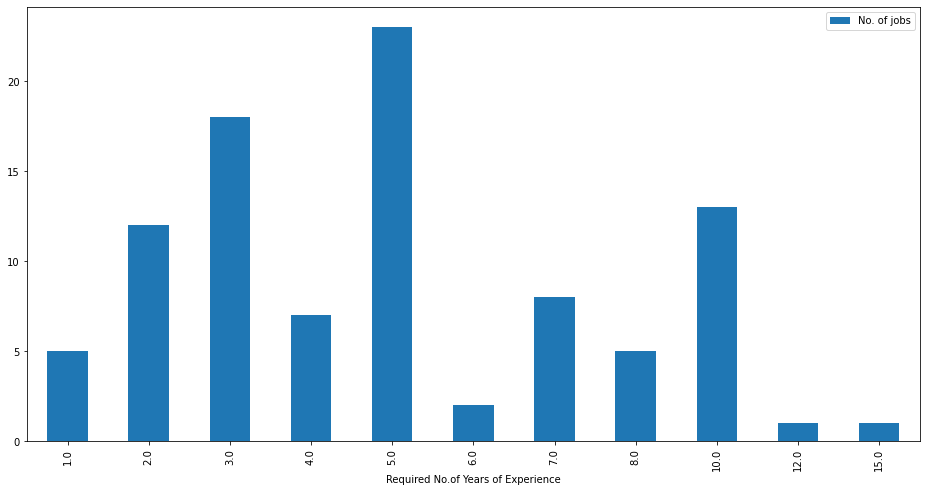

In [36]:
df_years=df_years.rename(columns={"snippet":"No. of jobs"})
df_years.index.name ="Required No.of Years of Experience"
df_years.plot(kind='bar', figsize=(16,8))

# Which Technology skills are in most demand

In [37]:
def extract_tech_count(s, tech):
    result_count = re.findall(tech, s)

    if result_count:
        return len(result_count)
    else:
        return np.nan

C:\Users\ppand\.virtualenvs\Python-r5K2irhc\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

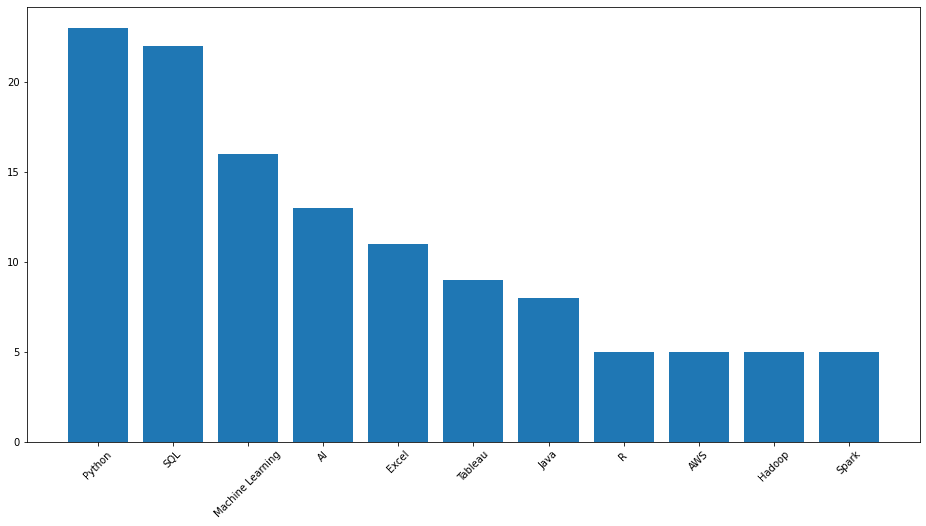

In [38]:
df_tech = pd.DataFrame(columns={"Tech", "No.ofJobs"})
tech_list = ["Python"," R ","SQL","Tableau", "Java", "AWS", "Hadoop", "Spark", "Machine Learning", "AI", "Excel"]

sample = df["snippet"]

for tech in tech_list:
    count =0
    job_tech = sample.apply(lambda s: extract_tech_count(s, tech))
  
    for i in range(0, len(job_tech)):
   
        if(pd.notna(job_tech[i])):
            count += 1
        else:
            continue
    tech_list_count = pd.DataFrame({"Tech":[tech], "No.ofJobs":[count]})
    df_tech = df_tech.append(tech_list_count)

df_tech = df_tech.sort_values(by = "No.ofJobs", ascending = False)
df_tech.set_index("Tech")
plt.figure(figsize=(16,8))
plt.bar(df_tech["Tech"],df_tech["No.ofJobs"] )
plt.xticks(rotation=45)
